In [2]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')

#print(wnba.head())
#print(wnba.tail())
#print(wnba.shape)

parameter = wnba['Games Played'].max()
sample = wnba.sample(30,random_state=1)
statistic = sample['Games Played'].max()
sampling_error = parameter - statistic
print(sampling_error)

2


Mencoba random sampling pada kolom PTS di dataset

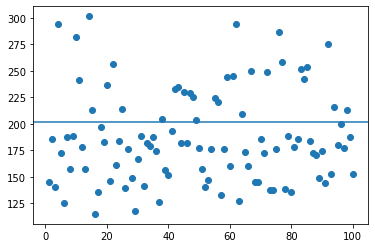

In [3]:
import matplotlib.pyplot as plt
samplePts=[]
popPts=wnba['PTS'].mean()

for i in range(100):
    pts = wnba['PTS'].sample(10,random_state=i)
    samplePts.append(pts.mean())
    
plt.scatter(range(1,101),samplePts)
plt.axhline(popPts)
    

Simple random sampling tidak akurat pada karena memiliki banyak sampling error. Salah satu cara mengurangi error adalah mengambil sample dengan jumlah yang lebih besar. Saat sample yang diambil semakin besar maka meningkatkan kemungkinan mendapat sample yang  merepresentasikan populasi sebenarnya.

Pada basket matrix (jumlah poin dan assist yang dihasilkan) bergantung pada posisi pemain tersebut. Saat menggunakan SRS(simple random sampling) kita mungkin mendapat sample yang tidak merepresentasikan posisi pemain tersebut. Selanjutnya kita akan mencoba ***stratified sampling***.

In [4]:
#Membuat total points/game yang dimainkan
#PPG = points per game
wnba['PPG'] = wnba['PTS']/wnba['Games Played']
pos = wnba['Pos'].unique()

stratumPPG = {}
# Mengklasifikasikan sesuai posisi dan mencari rata2 PPG per posisi
for p in pos:
    stratum = wnba[wnba['Pos']==p]
    sample = stratum['PPG'].sample(10,random_state=0)
    stratumPPG[p] = sample.mean()
 
#Mencari posisi yang menghasilkan PPG terbanyak 
positionMostPoints= max(stratumPPG,key=stratumPPG.get)
print(positionMostPoints)   



C


Selanjutnya kita akan melakukan stratified sampling dengan mengelompokkan para pemain berdasarkan berapa kali dia bermain.

In [5]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


Dari data diatas kita tahu bahwa mayoritas bermain >22 sampai maksimal 32 kali. Setelah mendapat persentase kita akan mengelompokkan sesuai dengan persentase ini.

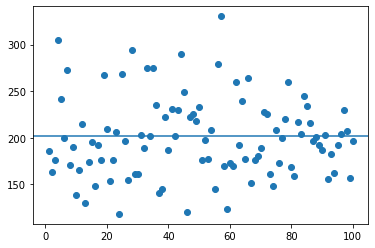

In [6]:
stratum1 = wnba[(wnba['Games Played']>1.969) & (wnba['Games Played']<=12)]
stratum2 = wnba[(wnba['Games Played']>12) & (wnba['Games Played']<=22)]
stratum3 = wnba[(wnba['Games Played']>22) & (wnba['Games Played']<=32)]

samplingMeans = []
for i in range(100):
    sample1 = stratum1.sample(1,random_state=i) 
    sample2 = stratum2.sample(2,random_state=i)
    sample3 = stratum3.sample(7,random_state=i)
    finalSample = pd.concat([sample1,sample2,sample3])
    samplingMeans.append(finalSample['PTS'].mean())
    
plt.scatter(range(1,101),samplingMeans)
plt.axhline(wnba['PTS'].mean())

Data diatas masih memiliki sampling error yang besar. Hal ini karena kita memilih strata yang salah untuk dikelompokkan. Harusnya kita memilih kolom 'MIN'(minuted played) yang lebih merepresentasikan berapa lama seorang pemain bermain sepanjang musim. Jika memakai kolom 'Games Played' seorang pemain dihitung bermain walau dia hanya bermain kurang dari 1 menit. Selanjutnya kita akan melakukan stratified sampling dengan kolom 'minutes played'


In [7]:
print(wnba['MIN'].value_counts(bins = 3, normalize = True) * 100)

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64


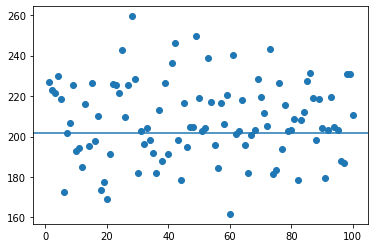

In [8]:
stratum1 = wnba[wnba['MIN']<=347.333]
stratum2 = wnba[(wnba['MIN']>347.333) & (wnba['MIN']<=682.667)]
stratum3 = wnba[wnba['MIN']>682.667 ]

samplingMeans = []
for i in range(100):
    sample1 = stratum1.sample(4,random_state=i) 
    sample2 = stratum2.sample(4,random_state=i)
    sample3 = stratum3.sample(4,random_state=i)
    finalSample = pd.concat([sample1,sample2,sample3])
    samplingMeans.append(finalSample['PTS'].mean())
    
plt.scatter(range(1,101),samplingMeans)
plt.axhline(wnba['PTS'].mean())

Selanjutnya kita akan mensample dari cluster tertentu. Cluster yang kita pakai adalah team.

In [9]:
teamCluster = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

teamsCluster = pd.DataFrame()

for team in teamCluster:
    sample = wnba[wnba['Team'] == team]
    teamsCluster = teamsCluster.append(sample)

population_height = wnba['Height'].mean()
populaton_age = wnba['Age'].mean()
population_bmi = wnba['BMI'].mean()
population_total_points = wnba['PTS'].mean()

sampling_error_height = population_height - (teamsCluster['Height'].mean())
sampling_error_age = populaton_age - teamsCluster['Age'].mean()
sampling_error_BMI = population_bmi - teamsCluster['BMI'].mean()
sampling_error_points = population_total_points - teamsCluster['PTS'].mean()

Selanjutnya kita akan membuat grafik pada beberapa kolom tertentu

Text(0, 0.5, '')

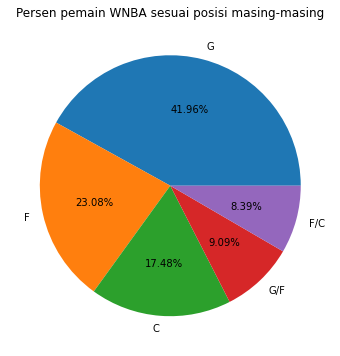

In [13]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',title='Persen pemain WNBA sesuai posisi masing-masing')
plt.ylabel('')

Text(0.5, 0, 'Games played')

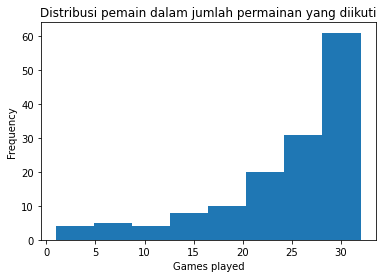

In [15]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8,title='Distribusi pemain dalam jumlah permainan yang diikuti')
plt.xlabel('Games played')

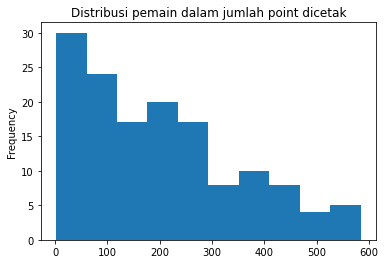

In [17]:
wnba['PTS'].plot.hist(title='Distribusi pemain dalam jumlah point dicetak')

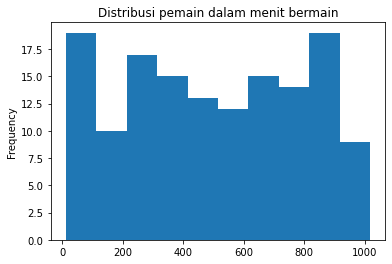

In [16]:
wnba['MIN'].plot.hist(title='Distribusi pemain dalam menit bermain')

In [38]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        #very few points
        return 'vfp'
    if (20 < row['PTS'] <=  80):
        #few points
        return 'fp'
    if (80 < row['PTS'] <=  150):
        #many,but below average
        return 'mbba'
    if (150 < row['PTS'] <= 300):
        #average number of points
        return 'anp'
    if (300 < row['PTS'] <=  450):
        #more than average
        return 'mta'
    else:
        #much more than average
        return 'mmta'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)


pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts()[['vfp','fp','mbba','anp','mta','mmta']]
print(pts_ordinal_desc)

vfp     12
fp      27
mbba    25
anp     45
mta     21
mmta    13
Name: PTS_ordinal_scale, dtype: int64


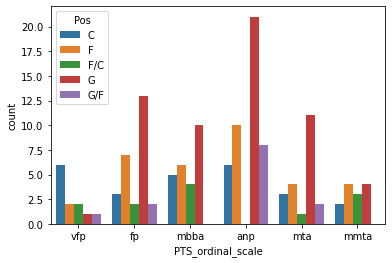

In [37]:
import seaborn as sns
sns.countplot(x = 'PTS_ordinal_scale', hue = 'Pos', data = wnba,order=['vfp','fp','mbba','anp','mta','mmta'],hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])

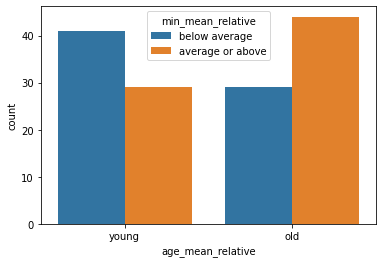

In [40]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else'below average')
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

In [42]:
print(wnba['PTS'].mean())

201.7902097902098


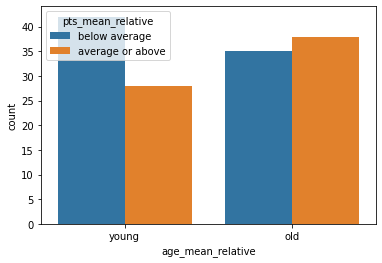

In [44]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['pts_mean_relative'] = wnba['PTS'].apply(lambda x: 'average or above' if x >= 201.79 else'below average')
sns.countplot(x = 'age_mean_relative', hue = 'pts_mean_relative', data = wnba)

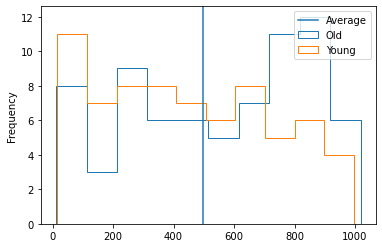

In [46]:
wnba[wnba['Age'] >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba['Age'] < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

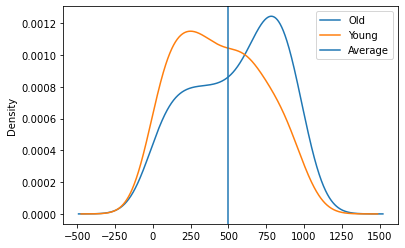

In [47]:
wnba[wnba.Age >= 27]['MIN'].plot.kde( label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde( label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

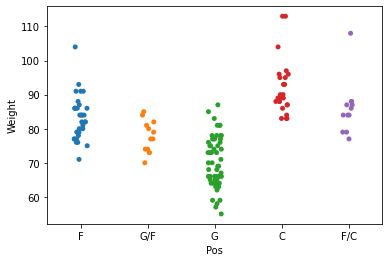

In [48]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
plt.show()

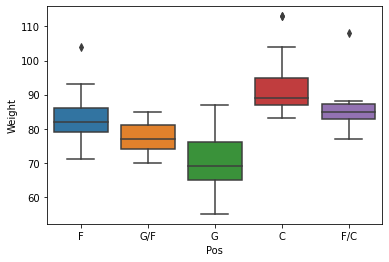

In [49]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()